In [6]:
import sys
sys.path.append('../')
import torch
from Code.NewNeurons import CooldownNeuron, NoResetNeuron, LIFNeuron
from matplotlib import pyplot as plt
%matplotlib


Using matplotlib backend: TkAgg


In [2]:
base_config = {
    'ALPHA': 0,
    'BETA': 0.3,
    'OFFSET': 2,
    'RESET_ZERO': False,
    'DECODING': 'potential',
    'SPIKE_FN': 'ss'
}

In [3]:
x = torch.linspace(-3, 3, 100)

elu = torch.nn.ELU()
def cd_trans(x):
    return elu(x-base_config['OFFSET']) + 1



In [4]:


it = torch.linspace(0, 9, 10)
ix = torch.tensor([0, 0.5, 2, -1, 0, 0.5, 3, 2, -0.3, -1]) *0.8
#plt.plot(it, torch.cumsum(cd_trans(ix), 0))

bt = torch.linspace(0, 1, 11)
#cy = torch.cumsum(cd_trans(ix), 0)


In [5]:
inp = [] # collect ix + trans
mem = [] # collect out

cd_neuron = CooldownNeuron(1, base_config)
out = torch.empty([10])
h = 0
for i in range(10):
    _, h = cd_neuron(ix[i], h)
    out[i] = h

inp.append(cd_trans(ix))
mem.append(out)

neuron = NoResetNeuron(1, base_config)
out = torch.empty([10])
h = [0]
for i in range(10):
    _, h = neuron(ix[i], h)
    out[i] = h[0]

inp.append(ix)
mem.append(out)


neuron = LIFNeuron(1, base_config)
out = torch.empty([10])
h = [0]
for i in range(10):
    _, h = neuron(ix[i], h)
    out[i] = h[0]

inp.append(ix)
mem.append(out)

xout = torch.empty([13])
out2 = torch.empty([13])
h = [0]
k = 0
for i in range(10):
    spike, h = neuron(ix[i], h)
    out2[k] = h[0] + spike
    xout[k] = i
    if spike == 1:
        k += 1
        out2[k] = h[0]
        xout[k] = i
    k += 1





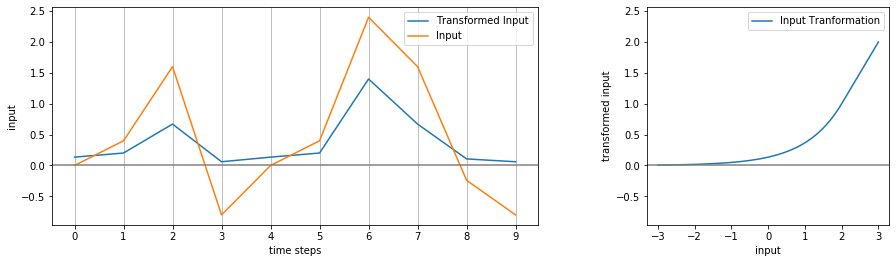

In [6]:

fig, axs = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [2, 1], 'wspace': 0.3, }, facecolor='white', figsize=(15,4))
axs[0].plot(it, cd_trans(ix), label='Transformed Input')
axs[0].plot(it, ix, label='Input')
axs[1].plot(x, cd_trans(x), label='Input Tranformation')
#axs[1].set_xticks([0,1,2])
axs[0].set(xlabel='time steps', ylabel='input')
axs[1].set(xlabel='input', ylabel='transformed input')
for i in [0]:
    axs[i].set_xticks(it)
    axs[i].grid(axis='x')

#axs[1].set_aspect(1)
#axs[0].set_aspect('equal')
#axs[0].set_ylim(-3,3)
#for ax in axs.flat:
#    ax.label_outer()

for i in [0, 1]:
    axs[i].axhline(0, c='grey')
    axs[i].legend()
    axs[i].yaxis.set_tick_params(labelleft=True)



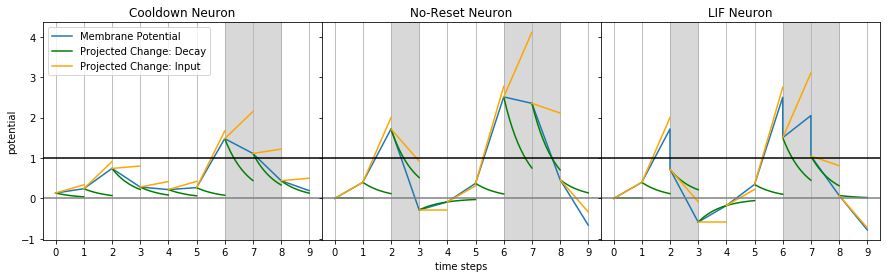

In [13]:
titles = ['Cooldown Neuron', 'No-Reset Neuron', 'LIF Neuron']

fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, gridspec_kw={'width_ratios': [1, 1, 1], 'wspace': 0, }, facecolor='white', figsize=(15,4))
for i in range(2):
    axs[i].plot(it, mem[i], label='Membrane Potential')

axs[2].plot(xout, out2, label='Membrane Potential')

for i in range(3):
    for k in range(9):
        axs[i].plot(bt+k, 0.3**bt*mem[i][k], color='green', label='Projected Change: Decay' if k == 0 else None)
        axs[i].plot((k, k+1), (mem[i][k], mem[i][k]+inp[i][k+1]), color='orange', label='Projected Change: Input' if k == 0 else None)
    axs[i].set_xticks(it)
    axs[i].grid(axis='x')
    axs[i].axhline(1, c='black')
    axs[i].axhline(0, c='grey')
    axs[i].set(ylabel='potential')
    axs[i].set_title(titles[i])
    axs[i].axvspan(6, 8, alpha=0.3, color='grey')

    #axs[i].yaxis.set_tick_params(labelleft=True)
for i in range(1, 3):
    axs[i].axvspan(2, 3, alpha=0.3, color='grey')


axs[1].set(xlabel='time steps', ylabel='potential')
axs[0].legend(loc='upper left')

for ax in axs.flat:
    ax.label_outer()

In [14]:
x = torch.linspace(-1, 1, 100)
plt.plot(x, torch.sigmoid(x*5), linewidth=3, linestyle='dashed')
plt.plot(x, (x>0).float(), linewidth=3)